# KNN Modeling Exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare
import acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

Continue working in your model file with the titanic dataset.

## Acquire

In [2]:
df = acquire.get_titanic_data()

## Prepare

In [3]:
# Prepare data
df = prepare.prep_titanic_data(df)
df.age = df.age.fillna(df.age.mean()) # cheater cheater pumpkin eater (stealing information from out-of-sample data)
df = df.drop(columns=['pclass', 'embarked', 'embarked_encode', 'passenger_id'])
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)

# Train, validate, test split
train, validate, test = prepare.split(df, stratify_by='survived')

# Create X and y objects
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [4]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
583,36.000000,0,0,40.1250,1,1,0,0,0,0,0
165,9.000000,0,2,20.5250,0,1,0,1,0,0,1
50,7.000000,4,1,39.6875,0,1,0,1,0,0,1
259,50.000000,0,1,26.0000,0,0,1,0,0,0,1
306,29.699118,0,0,110.8833,1,0,0,0,0,0,0


In [5]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [7]:
knn1.score(X_train, y_train)

0.9959839357429718

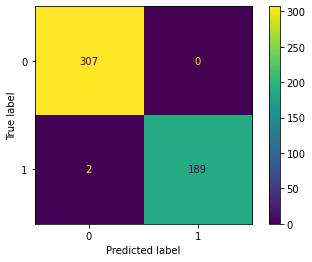

In [8]:
plot_confusion_matrix(knn1, X_train, y_train)

In [9]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,307,0
1,2,189


In [10]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       1.00      0.99      0.99       191

    accuracy                           1.00       498
   macro avg       1.00      0.99      1.00       498
weighted avg       1.00      1.00      1.00       498



In [11]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.993528,1.000000,0.995984,0.996764,0.996010
recall,1.000000,0.989529,0.995984,0.994764,0.995984
f1-score,0.996753,0.994737,0.995984,0.995745,0.995980
support,307.000000,191.000000,0.995984,498.000000,498.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [12]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

In [13]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [14]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.9959839357429718
Precision: 1.0
Recall: 0.9895287958115183
True Positive Rate: 0.9895287958115183
True Negative Rate: 1.0
False Positive Rate: 0.0
False Negative Rate: 0.010471204188481676
F1 Score: 0.9947368421052631
Support (0): 191
Support (1): 307


### 4. Run through steps 2-4 setting k to 10

In [15]:
# knn classifier with n_neighbour = 10

knn2 = KNeighborsClassifier(10)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.741848,0.738462,0.740964,0.740155,0.740549
recall,0.889251,0.502618,0.740964,0.695934,0.740964
f1-score,0.808889,0.598131,0.740964,0.703510,0.728056
support,307.000000,191.000000,0.740964,498.000000,498.000000


In [16]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,273,34
1,95,96


### 5. Run through setps 2-4 setting k to 20

In [17]:
# knn classifier with n_neighbour = 20

knn3 = KNeighborsClassifier(20)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 20")
pd.DataFrame(report)

n_neighbour = 20


,0,1,accuracy,macro avg,weighted avg
precision,0.723861,0.704000,0.718876,0.713930,0.716243
recall,0.879479,0.460733,0.718876,0.670106,0.718876
f1-score,0.794118,0.556962,0.718876,0.675540,0.703160
support,307.000000,191.000000,0.718876,498.000000,498.000000


In [18]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,270,37
1,103,88


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

|k|In-Sample Accuracy|
|-|-|
|1|99.6%|
|10|74.1%|
|20|71.9%|

Smaller numbers for k are able to capture details within the training set, but carry a risk for overfitting.

### 7.Which model performs best on our out-of-sample data from validate?

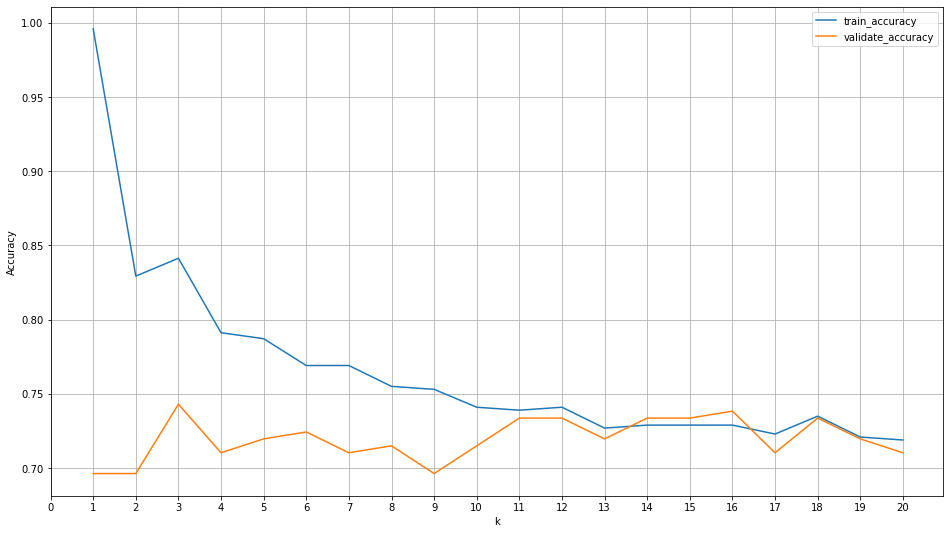

In [19]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### k=16 is the best performing model (accuracy)